### Install required libraries

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 4.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=4f54b7673d6e5ab3d00bad804e74793798257ae3667adf008f5f391c35e0e4ff
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=fd580f71c11fcd24acedbe7782c9cef07b966de791de60376d671fc0ddb27ac5
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


### Download Dataset

In [ ]:
!wget 'https://s3.amazonaws.com/isic-challenge-data/2019/ISIC_2019_Training_GroundTruth.csv'

--2020-11-16 16:22:02--  https://s3.amazonaws.com/isic-challenge-data/2019/ISIC_2019_Training_GroundTruth.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.40.214
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.40.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1291479 (1.2M) [text/csv]
Saving to: ‘ISIC_2019_Training_GroundTruth.csv’

ISIC_2019_Training_ 100%[===================>]   1.23M  3.32MB/s    in 0.4s    

2020-11-16 16:22:03 (3.32 MB/s) - ‘ISIC_2019_Training_GroundTruth.csv’ saved [1291479/1291479]



In [ ]:
!wget 'https://s3.amazonaws.com/isic-challenge-data/2019/ISIC_2019_Training_Metadata.csv'

--2020-11-16 16:22:03--  https://s3.amazonaws.com/isic-challenge-data/2019/ISIC_2019_Training_Metadata.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.249.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.249.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1214351 (1.2M) [text/csv]
Saving to: ‘ISIC_2019_Training_Metadata.csv’

ISIC_2019_Training_ 100%[===================>]   1.16M  2.83MB/s    in 0.4s    

2020-11-16 16:22:04 (2.83 MB/s) - ‘ISIC_2019_Training_Metadata.csv’ saved [1214351/1214351]



In [ ]:
!wget 'https://s3.amazonaws.com/isic-challenge-data/2019/ISIC_2019_Training_Input.zip'

--2020-11-16 16:22:04--  https://s3.amazonaws.com/isic-challenge-data/2019/ISIC_2019_Training_Input.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.249.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.249.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9771618190 (9.1G) [application/zip]
Saving to: ‘ISIC_2019_Training_Input.zip’

ISIC_2019_Training_ 100%[===================>]   9.10G  44.3MB/s    in 3m 44s  

2020-11-16 16:25:48 (41.6 MB/s) - ‘ISIC_2019_Training_Input.zip’ saved [9771618190/9771618190]



In [ ]:
!unzip 'ISIC_2019_Training_Input.zip'

Streaming output truncated to the last 5000 lines.
  inflating: ISIC_2019_Training_Input/ISIC_0065357.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065358.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065359.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065360.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065361.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065362.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065366.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065367.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065368.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065370.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065371.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065372.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065374.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065376.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065377.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065378.jpg  
  inflating: ISIC_2019_Training_Input

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [ ]:
labels = pd.read_csv('ISIC_2019_Training_GroundTruth.csv')
label_df = pd.DataFrame(labels)

In [ ]:
info = pd.read_csv('ISIC_2019_Training_Metadata.csv')
info_df = pd.DataFrame(info)

In [ ]:
label_df.tail()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25330,ISIC_0073254,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
info_df.head()

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [ ]:
info_df = info_df.drop('image',axis=1)

In [ ]:
info_df

,age_approx,anatom_site_general,lesion_id,sex
0,55.0,anterior torso,NaN,female
1,30.0,anterior torso,NaN,female
2,60.0,upper extremity,NaN,female
3,30.0,upper extremity,NaN,male
4,80.0,posterior torso,NaN,male
...,...,...,...,...
25326,85.0,head/neck,BCN_0003925,female
25327,65.0,anterior torso,BCN_0001819,male
25328,70.0,lower extremity,BCN_0001085,male
25329,55.0,palms/soles,BCN_0002083,female


In [ ]:
data = pd.concat([label_df, info_df], axis=1)

In [ ]:
data.head(10)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,anterior torso,NaN,female
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,anterior torso,NaN,female
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,upper extremity,NaN,female
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,upper extremity,NaN,male
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,posterior torso,NaN,male
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,posterior torso,NaN,female
6,ISIC_0000007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,posterior torso,NaN,female
7,ISIC_0000008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,anterior torso,NaN,female
8,ISIC_0000009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,anterior torso,NaN,female
9,ISIC_0000010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,posterior torso,NaN,female


In [ ]:
data['lesion_id'].fillna(method ='bfill', inplace=True)
data["age_approx"].fillna(30.0, inplace = True)
data["sex"].fillna("male", inplace = True)
data["anatom_site_general"].fillna( method ='ffill', inplace = True)

In [ ]:
data.head(20)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,anterior torso,MSK4_0011169,female
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,anterior torso,MSK4_0011169,female
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,upper extremity,MSK4_0011169,female
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,upper extremity,MSK4_0011169,male
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,posterior torso,MSK4_0011169,male
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,posterior torso,MSK4_0011169,female
6,ISIC_0000007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,posterior torso,MSK4_0011169,female
7,ISIC_0000008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,anterior torso,MSK4_0011169,female
8,ISIC_0000009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,anterior torso,MSK4_0011169,female
9,ISIC_0000010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,posterior torso,MSK4_0011169,female


In [ ]:
rows_with_nan = []
for index, row in data.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)
print(rows_with_nan)

[]


In [ ]:
data['anatom_site_general'].unique()

array(['anterior torso', 'upper extremity', 'posterior torso',
       'lower extremity', 'lateral torso', 'head/neck', 'palms/soles',
       'oral/genital'], dtype=object)

In [ ]:
anatom_site_general = {'anterior torso': 1,'upper extremity': 2,'posterior torso':3,'lower extremity':4, 'lateral torso':5,'head/neck':6,'palms/soles':7,'oral/genital':8} 
data['anatom_site_general'] = [anatom_site_general[item] for item in data['anatom_site_general']]

In [ ]:
sex = {'male': 0,'female':1} 
data['sex'] = [sex[item] for item in data['sex']]

In [ ]:
len(data['lesion_id'].unique())

11847

In [ ]:
data.head(6)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,1,MSK4_0011169,1
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1,MSK4_0011169,1
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,2,MSK4_0011169,1
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,2,MSK4_0011169,0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,3,MSK4_0011169,0
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,3,MSK4_0011169,1


In [ ]:
data = data.drop(['lesion_id'],axis=1)

In [ ]:
target = data[['MEL']].values

In [ ]:
data = data.drop(['image','MEL','NV'],axis=1)

In [ ]:
data

,BCC,AK,BKL,DF,VASC,SCC,UNK,age_approx,anatom_site_general,sex
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,2,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,2,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,3,0
...,...,...,...,...,...,...,...,...,...,...
25326,1.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,6,1
25327,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.0,1,0
25328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,4,0
25329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,7,1


In [ ]:
label = target

In [ ]:
list0 = [data, label]
list1 = ['x_train','y_train']
for i in range(2):
  print('The shape of the {} is {}'.format(list1[i],list0[i].shape))

The shape of the x_train is (25331, 10)
The shape of the y_train is (25331, 1)


In [ ]:
_,D = data.shape
print(D)

10


In [ ]:
from google.colab import files
import cv2

**I use this part to upload the downloaded images instead of download them in the colab.**

In [ ]:
'''uploaded = files.upload()
train_image = []
for i in uploaded.keys():
  train_image.append(cv2.resize(cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB), (32,32)))'''

'uploaded = files.upload()\ntrain_image = []\nfor i in uploaded.keys():\n  train_image.append(cv2.resize(cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB), (32,32)))'

In [ ]:
# Upload the images from folder
import os
def load_images_from_folder(folder):
    train_image = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
          train_image.append(cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (32,32)))          
    return train_image

In [ ]:
images = load_images_from_folder('ISIC_2019_Training_Input')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train_image = images[:20264]
test_image = images[20264:]
x_train = data[:20264]
x_test = data[20264:]
y_train = label[:20264]
y_test = label[20264:]

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

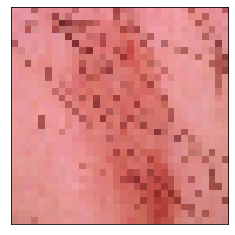

[1.]


In [ ]:
i = 2
plt.imshow(train_image[i])
plt.xticks([])
plt.yticks([])
plt.show()
print(y_train[i])

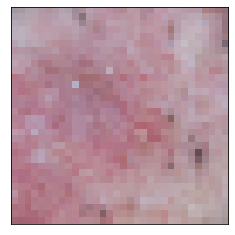

[0.]


In [ ]:
i = 0
plt.imshow(test_image[i])
plt.xticks([])
plt.yticks([])
plt.show()
print(y_test[i])

In [ ]:
train_image = np.asarray(train_image)
test_image = np.asarray(test_image)

In [ ]:
train_image = train_image.astype('float32')
test_image = test_image.astype('float32')

In [ ]:
mean = np.mean(train_image,axis=(0,1,2,3))
std = np.std(train_image,axis=(0,1,2,3))
train_image = (train_image-mean)/(std+1e-7)
test_image = (test_image-mean)/(std+1e-7)

In [ ]:
from keras.utils import np_utils
nClasses = 2
y_train = np_utils.to_categorical(y_train, nClasses)
y_test = np_utils.to_categorical(y_test, nClasses)

In [ ]:
print(test_image.shape)
print(y_train.shape)
print(y_test.shape)

(5067, 32, 32, 3)
(20264, 2)
(5067, 2)


In [ ]:
input_shape = (32,32,3)

In [ ]:
from keras import layers
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout , Input , Flatten , Conv2D , MaxPooling2D 
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping , ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers
from kerastuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
  # model_1
  model1_in = keras.Input(shape=(32,32,3))
  x = layers.Conv2D(64,(2,2),padding='same', activation='relu')(model1_in)
  x = layers.Conv2D(64,(2,2), activation='relu')(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)
  x = layers.Conv2D(128,(2,2),padding='same', activation='relu')(x)
  x = layers.Conv2D(128,(2,2), activation='relu')(x)
  x = layers.MaxPooling2D(pool_size=(2,2))(x)
  x = layers.Conv2D(256,(2,2),padding='same', activation='relu')(x)
  x = layers.Conv2D(256,(2,2), activation='relu')(x)
  x = layers.MaxPooling2D(pool_size=(2,2))(x)
  x = layers.Conv2D(512,(2,2),padding='same', activation='relu')(x)
  x = layers.Conv2D(512,(2,2), activation='relu')(x)
  x = layers.MaxPooling2D(pool_size=(2,2))(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dense(512, activation='relu')(x)
  x = layers.Dense(1024, activation='relu')(x)
  model1_out = layers.Dense(2, activation='sigmoid')(x)

  model1 = keras.Model(model1_in, model1_out)

  # model_2
  model2_in = keras.Input(shape=(D,))
  x = layers.Dense(16384, kernel_initializer='normal')(model2_in)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Dense(8192, kernel_initializer='normal')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Dense(4096, kernel_initializer='normal')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Dense(2048, kernel_initializer='normal')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Dense(1024, kernel_initializer='normal')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Dense(512, kernel_initializer='normal')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Dense(128, kernel_initializer='normal')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Dense(64, kernel_initializer='normal')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Dense(32, kernel_initializer='normal')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Dense(16, kernel_initializer='normal')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Dense(4, kernel_initializer='normal')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.1)(x)
  model2_out = layers.Dense(2, kernel_initializer='normal')(x)

  model2 = keras.Model(model2_in, model2_out)

  concatenated = concatenate([model1_out, model2_out])
  x = layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu')(concatenated)
  out = Dense(2, activation='sigmoid', name='output_layer',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(x)
  merged_model = Model([model1_in, model2_in], out)
  merged_model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),loss='binary_crossentropy',metrics=['accuracy'])
    
  return merged_model

tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,executions_per_trial=3,directory='my_dir',project_name='helloworld')

In [ ]:
tuner.search_space_summary()

In [ ]:
final=tuner.search([train_image, x_train], y=y_train, batch_size=32, epochs=5,verbose=1,validation_data=([test_image,x_test],y_test))

Epoch 1/5
634/634 [==============================] - 47s 74ms/step - loss: 0.4845 - accuracy: 0.8252 - val_loss: 0.4548 - val_accuracy: 0.7833
Epoch 2/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3897 - accuracy: 0.8310 - val_loss: 0.3997 - val_accuracy: 0.7833
Epoch 3/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3682 - accuracy: 0.8310 - val_loss: 0.3736 - val_accuracy: 0.7833
Epoch 4/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3584 - accuracy: 0.8310 - val_loss: 0.3691 - val_accuracy: 0.7833
Epoch 5/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3547 - accuracy: 0.8310 - val_loss: 0.3543 - val_accuracy: 0.7833
Epoch 1/5
634/634 [==============================] - 22s 35ms/step - loss: 0.4859 - accuracy: 0.8183 - val_loss: 0.4135 - val_accuracy: 0.7833
Epoch 2/5
634/634 [==============================] - 46s 72ms/step - loss: 0.3679 - accuracy: 0.8356 - val_loss: 0.3432 - val_accuracy: 0.8220

Epoch 1/5
634/634 [==============================] - 45s 72ms/step - loss: 0.4042 - accuracy: 0.8310 - val_loss: 0.4600 - val_accuracy: 0.7833
Epoch 2/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3982 - accuracy: 0.8310 - val_loss: 0.4214 - val_accuracy: 0.7833
Epoch 3/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3673 - accuracy: 0.8310 - val_loss: 0.3501 - val_accuracy: 0.7833
Epoch 4/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3573 - accuracy: 0.8310 - val_loss: 0.3628 - val_accuracy: 0.7833
Epoch 5/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3533 - accuracy: 0.8310 - val_loss: 0.3566 - val_accuracy: 0.7833
Epoch 1/5
634/634 [==============================] - 49s 77ms/step - loss: 0.3716 - accuracy: 0.8341 - val_loss: 0.3562 - val_accuracy: 0.8297
Epoch 2/5
634/634 [==============================] - 51s 81ms/step - loss: 0.3504 - accuracy: 0.8421 - val_loss: 0.3426 - val_accuracy: 0.8492

Epoch 1/5
634/634 [==============================] - 47s 73ms/step - loss: 0.3925 - accuracy: 0.8297 - val_loss: 0.3903 - val_accuracy: 0.7833
Epoch 2/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3640 - accuracy: 0.8310 - val_loss: 0.4141 - val_accuracy: 0.7833
Epoch 3/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3597 - accuracy: 0.8310 - val_loss: 0.3600 - val_accuracy: 0.7833
Epoch 4/5
634/634 [==============================] - 49s 77ms/step - loss: 0.3558 - accuracy: 0.8326 - val_loss: 0.3454 - val_accuracy: 0.8496
Epoch 5/5
634/634 [==============================] - 22s 35ms/step - loss: 0.3501 - accuracy: 0.8435 - val_loss: 0.3237 - val_accuracy: 0.8451
Epoch 1/5
634/634 [==============================] - 22s 35ms/step - loss: 0.4086 - accuracy: 0.8310 - val_loss: 0.4284 - val_accuracy: 0.7833
Epoch 2/5
634/634 [==============================] - 22s 35ms/step - loss: 0.3616 - accuracy: 0.8305 - val_loss: 0.3421 - val_accuracy: 0.7833

Epoch 1/5
634/634 [==============================] - 45s 71ms/step - loss: 0.6074 - accuracy: 0.8056 - val_loss: 0.4776 - val_accuracy: 0.7833
Epoch 2/5
634/634 [==============================] - 22s 34ms/step - loss: 0.4060 - accuracy: 0.8310 - val_loss: 0.4054 - val_accuracy: 0.7833
Epoch 3/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3776 - accuracy: 0.8310 - val_loss: 0.3962 - val_accuracy: 0.7833
Epoch 4/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3698 - accuracy: 0.8310 - val_loss: 0.3803 - val_accuracy: 0.7833
Epoch 5/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3627 - accuracy: 0.8310 - val_loss: 0.3806 - val_accuracy: 0.7833
Epoch 1/5
634/634 [==============================] - 22s 35ms/step - loss: 0.5055 - accuracy: 0.8310 - val_loss: 0.4550 - val_accuracy: 0.7833
Epoch 2/5
634/634 [==============================] - 49s 78ms/step - loss: 0.3856 - accuracy: 0.8330 - val_loss: 0.3786 - val_accuracy: 0.8176

Epoch 1/5
634/634 [==============================] - 46s 72ms/step - loss: 0.3791 - accuracy: 0.8366 - val_loss: 0.3318 - val_accuracy: 0.8433
Epoch 2/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3510 - accuracy: 0.8441 - val_loss: 0.3526 - val_accuracy: 0.8425
Epoch 3/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3464 - accuracy: 0.8485 - val_loss: 0.3319 - val_accuracy: 0.8319
Epoch 4/5
634/634 [==============================] - 21s 34ms/step - loss: 0.3452 - accuracy: 0.8462 - val_loss: 0.3514 - val_accuracy: 0.8277
Epoch 5/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3464 - accuracy: 0.8466 - val_loss: 0.3680 - val_accuracy: 0.8192
Epoch 1/5
634/634 [==============================] - 22s 35ms/step - loss: 0.3932 - accuracy: 0.8310 - val_loss: 0.3813 - val_accuracy: 0.7833
Epoch 2/5
634/634 [==============================] - 22s 34ms/step - loss: 0.3582 - accuracy: 0.8310 - val_loss: 0.3803 - val_accuracy: 0.7833

INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
tuner.results_summary()

In [ ]:
best_model.evaluate([test_image,x_test],y_test)

159/159 [==============================] - 1s 8ms/step - loss: 0.3454 - accuracy: 0.8496


[0.3454012870788574, 0.8496151566505432]